# Assignment-11-Text Mining-02-Amazon Product Reviews

In [1]:
! pip install scrapy


     -------------------------------------- 272.9/272.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 57.9/57.9 kB ? eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 92.9/92.9 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 13.9 MB/s eta 0:00:00
     -------------------------------------- 204.1/204.1 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 83.9/83.9 kB 4.9 MB/s eta 0:00:00
     ------------------------------------- 181.3/181.3 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 74.6/74.6 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [5]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Easy to use. The b...
1,4.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Cardboard pages, b..."
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My 1Year kid used ...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Usefully for babie...
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good books for chi...
5,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I USING TO MY GRAN...
6,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It's a really good...
7,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I really loved it!...
8,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Excellent book for...
9,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Kids will enjoy re...


## Text Preprocessing

In [7]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Easy to use. The baby can hold it which is a good thing. Almost covers the basics for a child.',
 'Cardboard pages, book box is awesome. Helping my son to grow interest on books as well as knowing colours, alphabet, animals, vehicles etc.',
 'My 1Year kid used to play with books, Quality is very goodgiving 1 star less because the high price.',
 'Usefully for babies knowledge',
 'Good books for children',
 'I USING TO MY GRAND CHILD 1.5 YEAR OLD',
 "It's a really good set of books with basic pictures of stuff. Good learning for the young ones. Simple yet food quality hard bound books. Must have for a toddler.",
 'I really loved it!!! The moment my baby saw the book.She deep dive into the book and pictures were so Realistic and eye catching one!!!Much needed for babies.I would strongly recommend this!!!',
 'Excellent book for kids ...Helps in mind improvementRemember things and recognise easily',
 'Kids will enjoy reading these.']

In [8]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"Easy to use. The baby can hold it which is a good thing. Almost covers the basics for a child. Cardboard pages, book box is awesome. Helping my son to grow interest on books as well as knowing colours, alphabet, animals, vehicles etc. My 1Year kid used to play with books, Quality is very goodgiving 1 star less because the high price. Usefully for babies knowledge Good books for children I USING TO MY GRAND CHILD 1.5 YEAR OLD It's a really good set of books with basic pictures of stuff. Good learning for the young ones. Simple yet food quality hard bound books. Must have for a toddler. I really loved it!!! The moment my baby saw the book.She deep dive into the book and pictures were so Realistic and eye catching one!!!Much needed for babies.I would strongly recommend this!!! Excellent book for kids ...Helps in mind improvementRemember things and recognise easily Kids will enjoy reading these."

In [9]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Easy to use The baby can hold it which is a good thing Almost covers the basics for a child Cardboard pages book box is awesome Helping my son to grow interest on books as well as knowing colours alphabet animals vehicles etc My 1Year kid used to play with books Quality is very goodgiving 1 star less because the high price Usefully for babies knowledge Good books for children I USING TO MY GRAND CHILD 15 YEAR OLD Its a really good set of books with basic pictures of stuff Good learning for the young ones Simple yet food quality hard bound books Must have for a toddler I really loved it The moment my baby saw the bookShe deep dive into the book and pictures were so Realistic and eye catching oneMuch needed for babiesI would strongly recommend this Excellent book for kids Helps in mind improvementRemember things and recognise easily Kids will enjoy reading these'

In [10]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Easy', 'to', 'use', 'The', 'baby', 'can', 'hold', 'it', 'which', 'is', 'a', 'good', 'thing', 'Almost', 'covers', 'the', 'basics', 'for', 'a', 'child', 'Cardboard', 'pages', 'book', 'box', 'is', 'awesome', 'Helping', 'my', 'son', 'to', 'grow', 'interest', 'on', 'books', 'as', 'well', 'as', 'knowing', 'colours', 'alphabet', 'animals', 'vehicles', 'etc', 'My', '1Year', 'kid', 'used', 'to', 'play', 'with']


In [12]:
len(text_tokens)

158

In [13]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Easy', 'use', 'baby', 'hold', 'good', 'thing', 'Almost', 'covers', 'basics', 'child', 'Cardboard', 'pages', 'book', 'box', 'awesome', 'Helping', 'son', 'grow', 'interest', 'books', 'well', 'knowing', 'colours', 'alphabet', 'animals', 'vehicles', 'etc', 'My', '1Year', 'kid', 'used', 'play', 'books', 'Quality', 'goodgiving', '1', 'star', 'less', 'high', 'price', 'Usefully', 'babies', 'knowledge', 'Good', 'books', 'children', 'USING', 'TO', 'MY', 'GRAND', 'CHILD', '15', 'YEAR', 'OLD', 'Its', 'really', 'good', 'set', 'books', 'basic', 'pictures', 'stuff', 'Good', 'learning', 'young', 'ones', 'Simple', 'yet', 'food', 'quality', 'hard', 'bound', 'books', 'Must', 'toddler', 'really', 'loved', 'moment', 'baby', 'saw', 'bookShe', 'deep', 'dive', 'book', 'pictures', 'Realistic', 'eye', 'catching', 'oneMuch', 'needed', 'babiesI', 'would', 'strongly', 'recommend', 'Excellent', 'book', 'kids', 'Helps', 'mind', 'improvementRemember', 'things', 'recognise', 'easily', 'Kids', 'enjoy', 'reading']


In [14]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['easy', 'use', 'baby', 'hold', 'good', 'thing', 'almost', 'covers', 'basics', 'child', 'cardboard', 'pages', 'book', 'box', 'awesome', 'helping', 'son', 'grow', 'interest', 'books', 'well', 'knowing', 'colours', 'alphabet', 'animals', 'vehicles', 'etc', 'my', '1year', 'kid', 'used', 'play', 'books', 'quality', 'goodgiving', '1', 'star', 'less', 'high', 'price', 'usefully', 'babies', 'knowledge', 'good', 'books', 'children', 'using', 'to', 'my', 'grand', 'child', '15', 'year', 'old', 'its', 'really', 'good', 'set', 'books', 'basic', 'pictures', 'stuff', 'good', 'learning', 'young', 'ones', 'simple', 'yet', 'food', 'quality', 'hard', 'bound', 'books', 'must', 'toddler', 'really', 'loved', 'moment', 'baby', 'saw', 'bookshe', 'deep', 'dive', 'book', 'pictures', 'realistic', 'eye', 'catching', 'onemuch', 'needed', 'babiesi', 'would', 'strongly', 'recommend', 'excellent', 'book', 'kids', 'helps', 'mind', 'improvementremember', 'things', 'recognise', 'easily', 'kids', 'enjoy', 'reading']


In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['easi', 'use', 'babi', 'hold', 'good', 'thing', 'almost', 'cover', 'basic', 'child', 'cardboard', 'page', 'book', 'box', 'awesom', 'help', 'son', 'grow', 'interest', 'book', 'well', 'know', 'colour', 'alphabet', 'anim', 'vehicl', 'etc', 'my', '1year', 'kid', 'use', 'play', 'book', 'qualiti', 'goodgiv', '1', 'star', 'less', 'high', 'price', 'use', 'babi', 'knowledg', 'good', 'book', 'children', 'use', 'to', 'my', 'grand', 'child', '15', 'year', 'old', 'it', 'realli', 'good', 'set', 'book', 'basic', 'pictur', 'stuff', 'good', 'learn', 'young', 'one', 'simpl', 'yet', 'food', 'qualiti', 'hard', 'bound', 'book', 'must', 'toddler', 'realli', 'love', 'moment', 'babi', 'saw', 'booksh', 'deep', 'dive', 'book', 'pictur', 'realist', 'eye', 'catch', 'onemuch', 'need', 'babiesi', 'would', 'strongli', 'recommend', 'excel', 'book', 'kid', 'help', 'mind', 'improvementrememb', 'thing', 'recognis', 'easili', 'kid', 'enjoy', 'read']


In [18]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

easy use baby hold good thing almost covers basics child cardboard pages book box awesome helping son grow interest books well knowing colours alphabet animals vehicles etc my 1year kid used play books quality goodgiving 1 star less high price usefully babies knowledge good books children using to my grand child 15 year old its really good set books basic pictures stuff good learning young ones simple yet food quality hard bound books must toddler really loved moment baby saw bookshe deep dive book pictures realistic eye catching onemuch needed babiesi would strongly recommend excellent book kids helps mind improvementremember things recognise easily kids enjoy reading


In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['easy', 'use', 'baby', 'hold', 'good', 'thing', 'almost', 'cover', 'basic', 'child', 'cardboard', 'page', 'book', 'box', 'awesome', 'help', 'son', 'grow', 'interest', 'book', 'well', 'know', 'colour', 'alphabet', 'animal', 'vehicle', 'etc', 'my', '1year', 'kid', 'use', 'play', 'book', 'quality', 'goodgive', '1', 'star', 'less', 'high', 'price', 'usefully', 'baby', 'knowledge', 'good', 'book', 'child', 'use', 'to', 'my', 'grand', 'child', '15', 'year', 'old', 'its', 'really', 'good', 'set', 'book', 'basic', 'picture', 'stuff', 'good', 'learn', 'young', 'one', 'simple', 'yet', 'food', 'quality', 'hard', 'bind', 'book', 'must', 'toddler', 'really', 'love', 'moment', 'baby', 'see', 'bookshe', 'deep', 'dive', 'book', 'picture', 'realistic', 'eye', 'catch', 'onemuch', 'need', 'babiesi', 'would', 'strongly', 'recommend', 'excellent', 'book', 'kid', 'help', 'mind', 'improvementremember', 'thing', 'recognise', 'easily', 'kid', 'enjoy', 'read']


In [20]:
clean_reviews=' '.join(lemmas)
clean_reviews

'easy use baby hold good thing almost cover basic child cardboard page book box awesome help son grow interest book well know colour alphabet animal vehicle etc my 1year kid use play book quality goodgive 1 star less high price usefully baby knowledge good book child use to my grand child 15 year old its really good set book basic picture stuff good learn young one simple yet food quality hard bind book must toddler really love moment baby see bookshe deep dive book picture realistic eye catch onemuch need babiesi would strongly recommend excellent book kid help mind improvementremember thing recognise easily kid enjoy read'

## Feature Extaction

### 1. Using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'easy': 21, 'use': 72, 'baby': 7, 'hold': 34, 'good': 27, 'thing': 69, 'almost': 2, 'cover': 17, 'basic': 8, 'child': 15, 'cardboard': 13, 'page': 52, 'book': 10, 'box': 12, 'awesome': 5, 'help': 32, 'son': 65, 'grow': 30, 'interest': 36, 'well': 75, 'know': 39, 'colour': 16, 'alphabet': 3, 'animal': 4, 'vehicle': 74, 'etc': 23, 'my': 47, '1year': 1, 'kid': 38, 'play': 54, 'quality': 56, 'goodgive': 28, 'star': 66, 'less': 42, 'high': 33, 'price': 55, 'usefully': 73, 'knowledge': 40, 'to': 70, 'grand': 29, '15': 0, 'year': 77, 'old': 49, 'its': 37, 'really': 59, 'set': 63, 'picture': 53, 'stuff': 68, 'learn': 41, 'young': 79, 'one': 50, 'simple': 64, 'yet': 78, 'food': 26, 'hard': 31, 'bind': 9, 'must': 46, 'toddler': 71, 'love': 43, 'moment': 45, 'see': 62, 'bookshe': 11, 'deep': 18, 'dive': 19, 'realistic': 58, 'eye': 25, 'catch': 14, 'onemuch': 51, 'need': 48, 'babiesi': 6, 'would': 76, 'strongly': 67, 'recommend': 61, 'excellent': 24, 'mind': 44, 'improvementremember': 35, 'recogn

In [24]:
print(cv.get_feature_names_out()[150:300])

[]


In [25]:
print(reviewscv.toarray()[150:300])

[]


In [26]:
print(reviewscv.toarray().shape)

(106, 80)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [29]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['15' '1year' 'almost' 'alphabet' 'animal' 'awesome' 'babiesi' 'baby'
 'basic' 'bind' 'book' 'bookshe' 'box' 'cardboard' 'catch' 'child'
 'colour' 'cover' 'deep' 'dive' 'easily' 'easy' 'enjoy' 'etc' 'excellent'
 'eye' 'food' 'good' 'goodgive' 'grand' 'grow' 'hard' 'help' 'high' 'hold'
 'improvementremember' 'interest' 'its' 'kid' 'know' 'knowledge' 'learn'
 'less' 'love' 'mind' 'moment' 'must' 'my' 'need' 'old' 'one' 'onemuch'
 'page' 'picture' 'play' 'price' 'quality' 'read' 'realistic' 'really'
 'recognise' 'recommend' 'see' 'set' 'simple' 'son' 'star' 'strongly'
 'stuff' 'thing' 'to' 'toddler' 'use' 'usefully' 'vehicle' 'well' 'would'
 'year' 'yet' 'young']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['15' '1year' 'almost' 'alphabet' 'animal' 'awesome' 'babiesi' 'baby'
 'basic' 'bind' 'book' 'bookshe' 'box' 'cardboard' 'catch' 'child'
 'colour' 'cover' 'deep' 'dive' 'easily' 'easy' 'enjoy' 'etc' 'excellent'
 'eye' 'food' 'good' 'goodgive' 'grand' 'grow' 'hard' 'help' 'high' 'hold'
 'improvementremember' 'interest' 'its' 'kid' 'know' 'knowledge' 'learn'
 'less' 'love' 'mind' 'moment' 'must' 'my' 'need' 'old' 'one' 'onemuch'
 'page' 'picture' 'play' 'price' 'quality' 'read' 'realistic' 'really'
 'recognise' 'recommend' 'see' 'set' 'simple' 'son' 'star' 'strongly'
 'stuff' 'thing' 'to' 'toddler' 'use' 'usefully' 'vehicle' 'well' 'would'
 'year' 'yet' 'young']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Generate Word Cloud

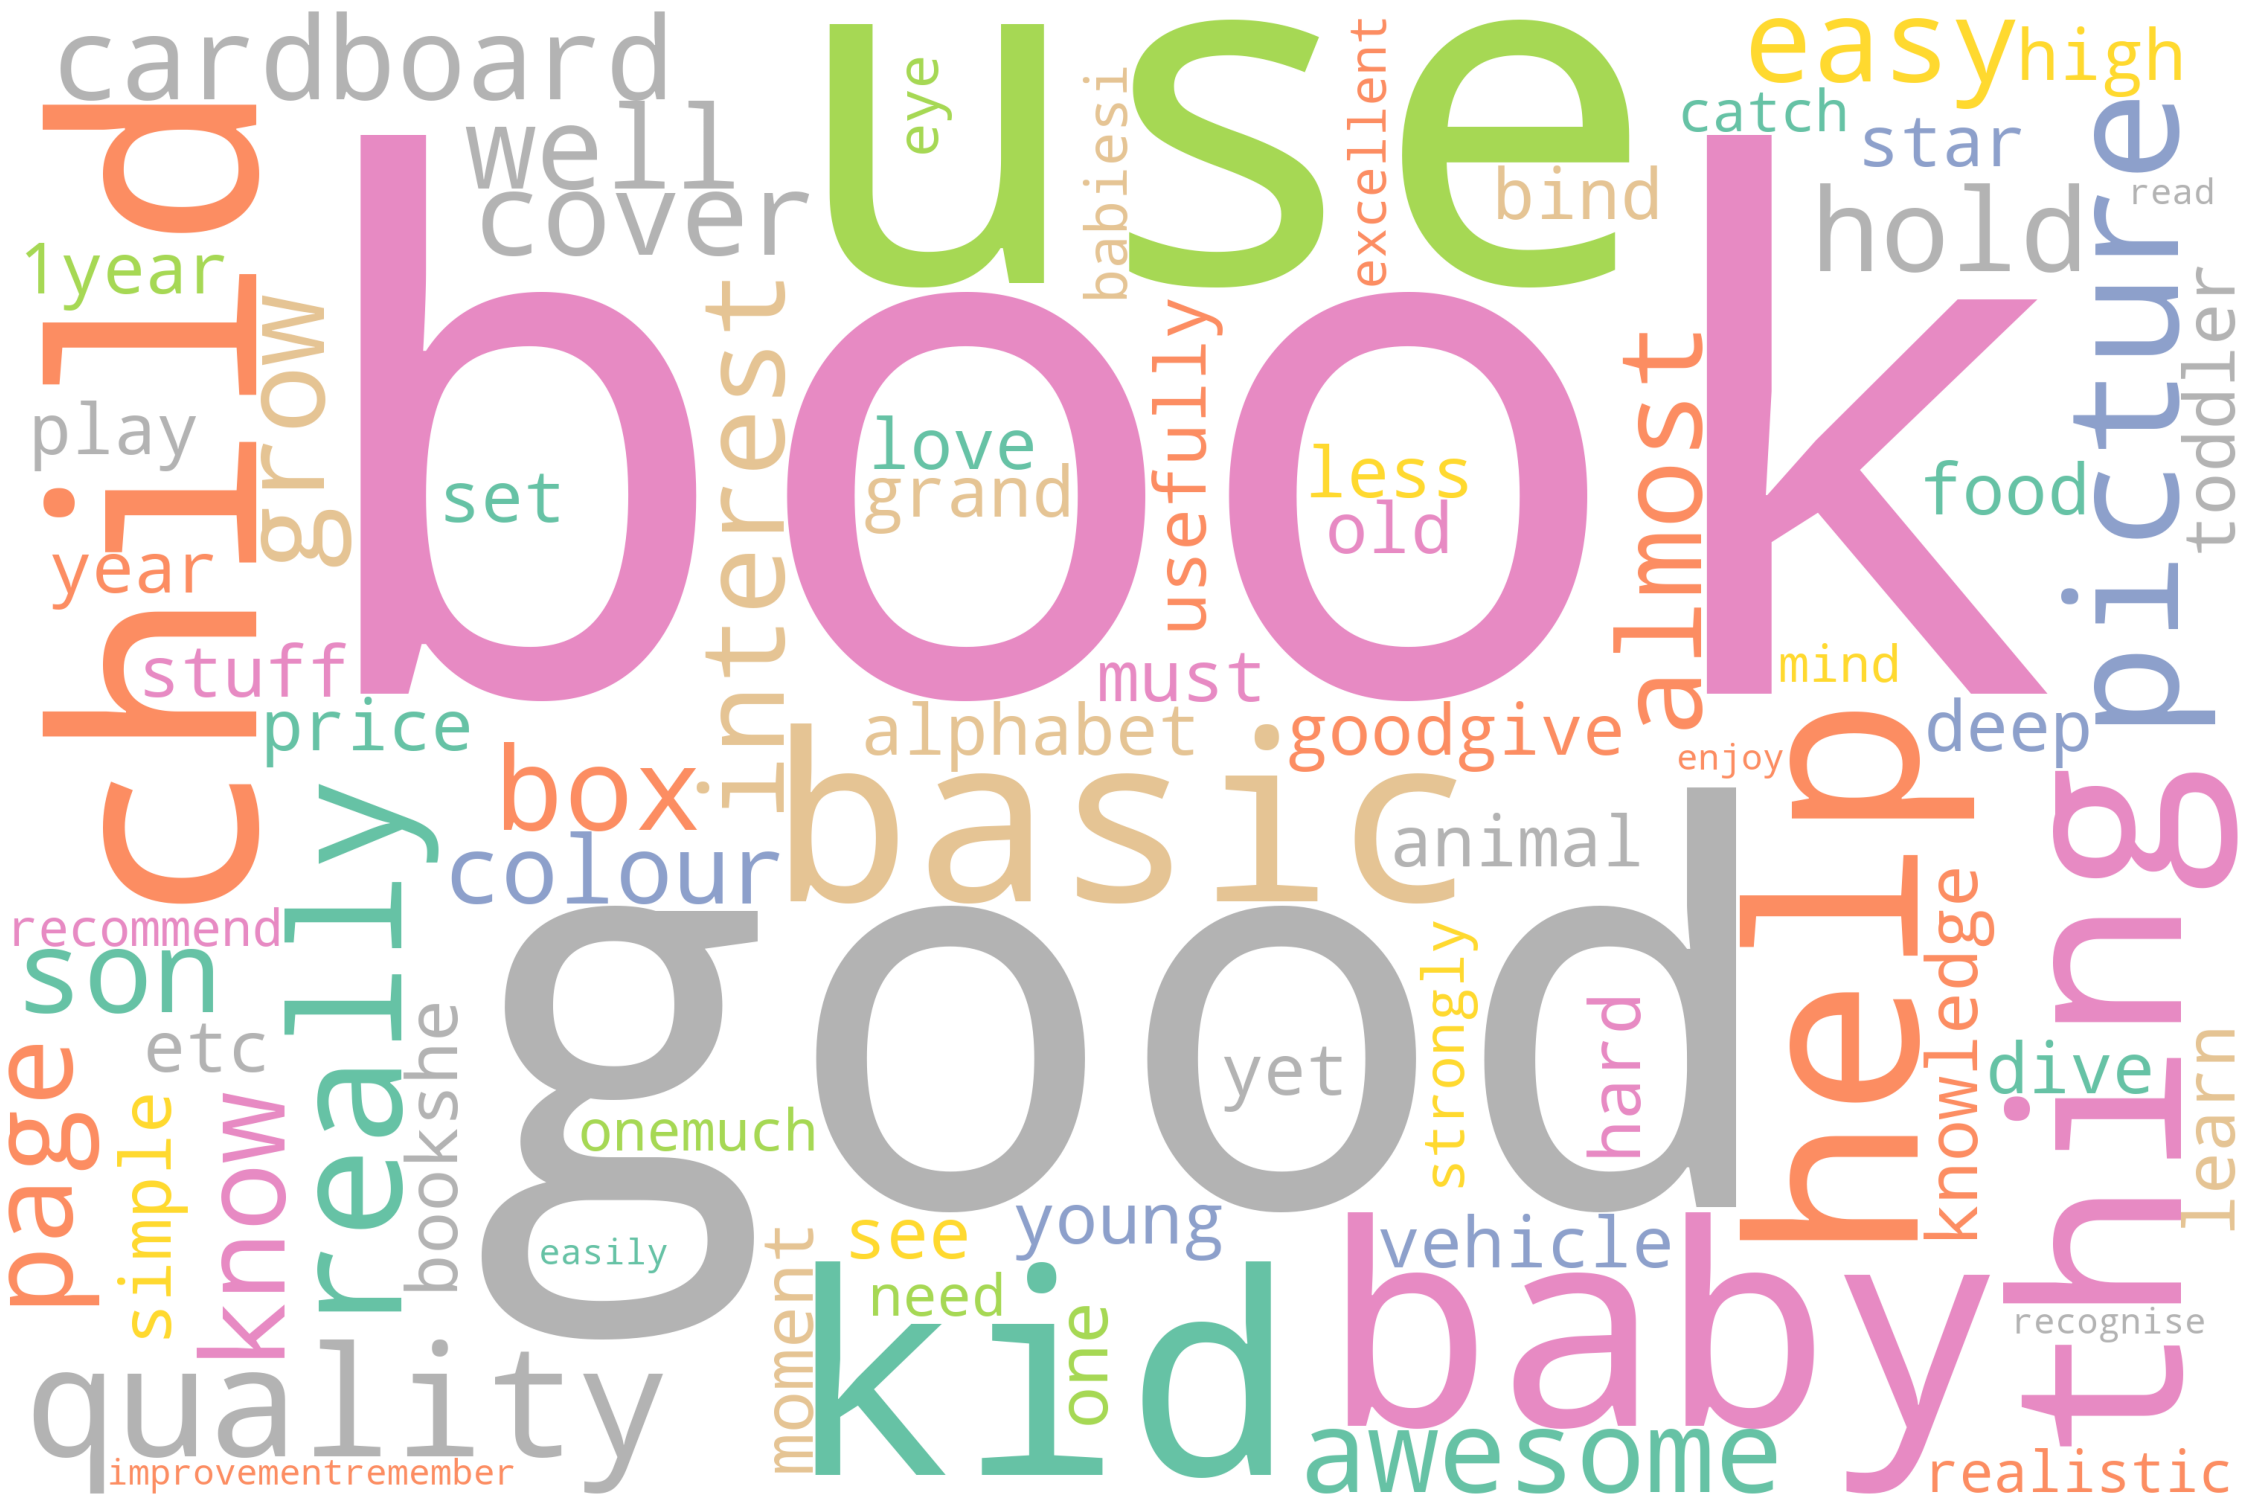

In [33]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [34]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [35]:
for token in doc_block[100:200]:
    print(token,token.pos_)

thing NOUN
recognise NOUN
easily ADV
kid NOUN
enjoy NOUN
read VERB


In [36]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

[]


In [37]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,7
1,use,3
2,baby,3
3,child,3
4,kid,3
5,thing,2
6,help,2
7,quality,2
8,picture,2
9,hold,1


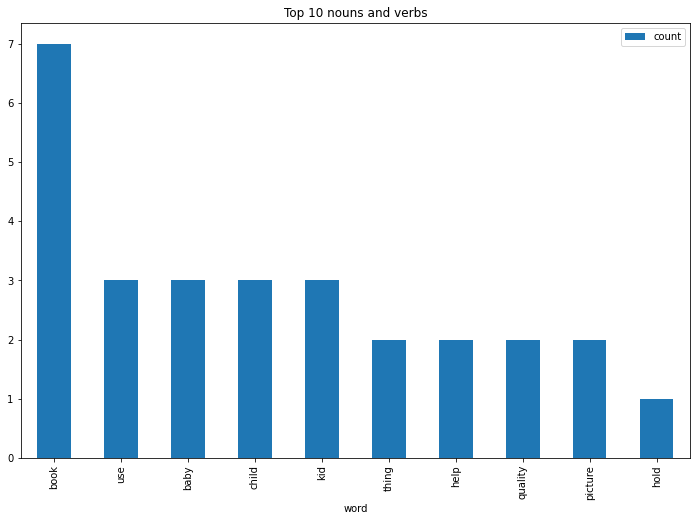

In [38]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [39]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Easy to use.',
 'The baby can hold it which is a good thing.',
 'Almost covers the basics for a child.',
 'Cardboard pages, book box is awesome.',
 'Helping my son to grow interest on books as well as knowing colours, alphabet, animals, vehicles etc.',
 'My 1Year kid used to play with books, Quality is very goodgiving 1 star less because the high price.',
 "Usefully for babies knowledge Good books for children I USING TO MY GRAND CHILD 1.5 YEAR OLD It's a really good set of books with basic pictures of stuff.",
 'Good learning for the young ones.',
 'Simple yet food quality hard bound books.',
 'Must have for a toddler.',
 'I really loved it!!!',
 'The moment my baby saw the book.She deep dive into the book and pictures were so Realistic and eye catching one!!',
 '!Much needed for babies.I would strongly recommend this!!!',
 'Excellent book for kids ...Helps in mind improvementRemember things and recognise easily Kids will enjoy reading these.']

In [40]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Easy to use.
1,The baby can hold it which is a good thing.
2,Almost covers the basics for a child.
3,"Cardboard pages, book box is awesome."
4,Helping my son to grow interest on books as we...
5,"My 1Year kid used to play with books, Quality ..."
6,Usefully for babies knowledge Good books for c...
7,Good learning for the young ones.
8,Simple yet food quality hard bound books.
9,Must have for a toddler.


In [42]:
# Emotion Lexicon - Affin
affin=pd.read_csv('afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
# manual testing
calculate_sentiment(text='good service')

3

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     1
1     3
2     0
3     4
4     3
5     0
6     6
7     3
8    -1
9     0
10    3
11    0
12    2
13    7
Name: sentiment_value, dtype: int64

In [47]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      3
1     10
2      7
3      6
4     17
5     19
6     29
7      6
8      7
9      5
10     4
11    21
12     8
13    17
Name: word_count, dtype: int64

In [48]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
8,Simple yet food quality hard bound books.,-1,7
2,Almost covers the basics for a child.,0,7
5,"My 1Year kid used to play with books, Quality ...",0,19
9,Must have for a toddler.,0,5
11,The moment my baby saw the book.She deep dive ...,0,21
0,Easy to use.,1,3
12,!Much needed for babies.I would strongly recom...,2,8
1,The baby can hold it which is a good thing.,3,10
4,Helping my son to grow interest on books as we...,3,17
7,Good learning for the young ones.,3,6


In [49]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    14.000000
mean      2.214286
std       2.391606
min      -1.000000
25%       0.000000
50%       2.500000
75%       3.000000
max       7.000000
Name: sentiment_value, dtype: float64

In [50]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,Almost covers the basics for a child.,0,7
5,"My 1Year kid used to play with books, Quality ...",0,19
8,Simple yet food quality hard bound books.,-1,7
9,Must have for a toddler.,0,5
11,The moment my baby saw the book.She deep dive ...,0,21


In [51]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Easy to use.,1,3
1,The baby can hold it which is a good thing.,3,10
3,"Cardboard pages, book box is awesome.",4,6
4,Helping my son to grow interest on books as we...,3,17
6,Usefully for babies knowledge Good books for c...,6,29
7,Good learning for the young ones.,3,6
10,I really loved it!!!,3,4
12,!Much needed for babies.I would strongly recom...,2,8
13,Excellent book for kids ...Helps in mind impro...,7,17


In [52]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Easy to use.,1,3,0
1,The baby can hold it which is a good thing.,3,10,1
2,Almost covers the basics for a child.,0,7,2
3,"Cardboard pages, book box is awesome.",4,6,3
4,Helping my son to grow interest on books as we...,3,17,4
5,"My 1Year kid used to play with books, Quality ...",0,19,5
6,Usefully for babies knowledge Good books for c...,6,29,6
7,Good learning for the young ones.,3,6,7
8,Simple yet food quality hard bound books.,-1,7,8
9,Must have for a toddler.,0,5,9


C:\Users\yadav\AppData\Local\Temp\ipykernel_7940\3324071075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

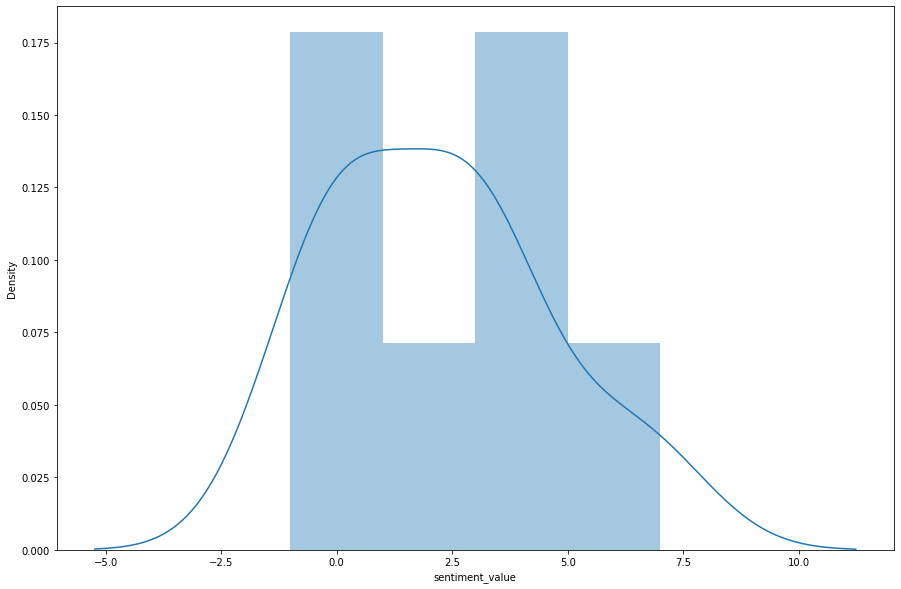

In [53]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

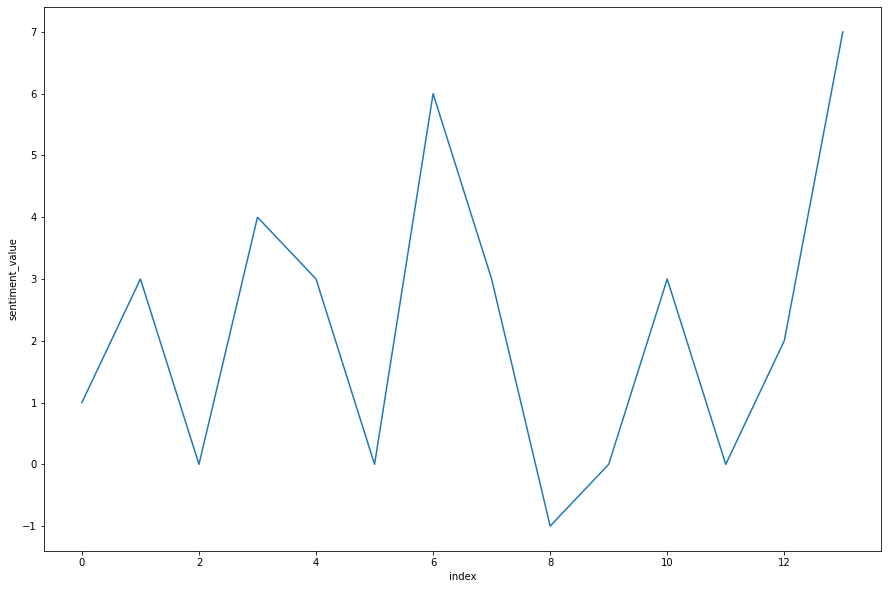

In [54]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)